In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import joblib

In [4]:
df = pd.read_csv("hate_speech_detection_train.csv")
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.isnull().sum()


,0
count,0
hate_speech_count,0
offensive_language_count,0
neither_count,0
class,0
tweet,0


In [6]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [7]:
df.shape

(24783, 6)

Text(0.5, 1.0, 'Class Distribution')

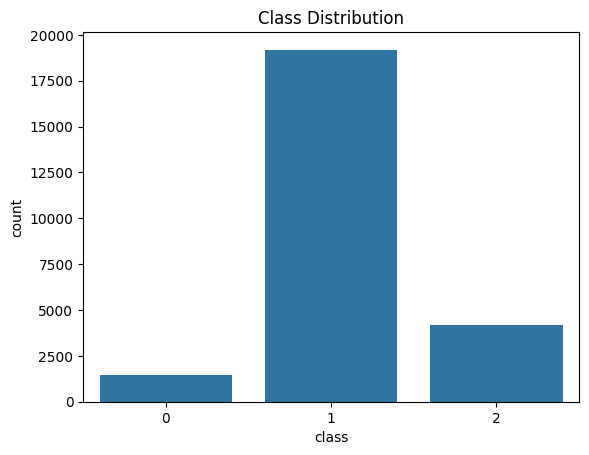

In [8]:
sns.countplot(x='class', data=df)
plt.title("Class Distribution")


In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@[\w]*', '', text)  # remove @mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove non-letters
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_tweet'] = df['tweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_tweet'])
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [12]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

              precision    recall  f1-score   support

 Hate Speech       0.64      0.16      0.26       286
   Offensive       0.91      0.97      0.94      3838
     Neither       0.84      0.82      0.83       833

    accuracy                           0.90      4957
   macro avg       0.80      0.65      0.67      4957
weighted avg       0.88      0.90      0.88      4957



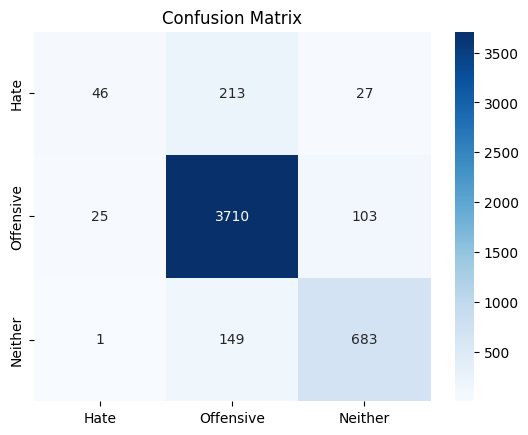

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Hate Speech', 'Offensive', 'Neither']))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate', 'Offensive', 'Neither'],
            yticklabels=['Hate', 'Offensive', 'Neither'])
plt.title("Confusion Matrix")
plt.show()


In [14]:
import joblib

# Save model
joblib.dump(model, 'hate_speech_model.pkl')

# Save vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')



['tfidf_vectorizer.pkl']

In [15]:
# Load model
loaded_model = joblib.load('hate_speech_model.pkl')

# Load vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example use
sample = ["You are stupid and ugly!"]
cleaned_sample = [clean_text(sample[0])]
vectorized = loaded_vectorizer.transform(cleaned_sample)
prediction = loaded_model.predict(vectorized)
print("Predicted class:", prediction[0])


Predicted class: 0


In [16]:
from google.colab import files
files.download('tfidf_vectorizer.pkl')
files.download('hate_speech_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Train SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [18]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [19]:
files.download('svm_model.pkl')
files.download('rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>